<AxesSubplot:xlabel='Date'>

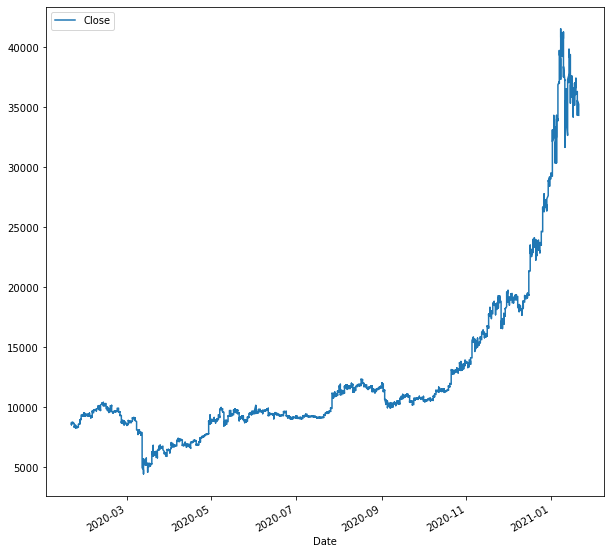

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
data=yf.download('BTC-USD',start='2020-01-21', interval='1h',  end='2021-01-21',progress=False)[['Close']]
data.head()
 
data.plot(figsize=(10,10))

In [2]:
# coin_list = [
# 'BTC','ETH','USDT','DOT','XRP',
# 'ADA','LINK','LTC','BCH','XLM',
# 'BNB','DOGE','USDC','HEX','UNI',
# 'WBTC','AAVE','BSV','EOS','CEL'
# ]
# for file_ in all_files:
#     df = pd.read_csv(file_,index_col=None, header=0)
#     list_.append(df)
    
# BTC_df = pd.read_csv('resources/BTC.csv')
# ,'ETH','USDT','DOT','XRP',
# 'ADA','LINK','LTC','BCH','XLM',
# 'BNB','DOGE','USDC','HEX','UNI',
# 'WBTC','AAVE','BSV','EOS','CEL'


In [3]:
# import os
# import glob

# path = r'resources/'
# all_files = glob.glob(path + "/*.csv")
# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)

# df = pd.concat(li, axis=0, ignore_index=True)
# df = df.fillna(0)

In [4]:
# bitcoin_df = df.loc[(df['asset_id']==1)] 
# bitcoin_df 
bitcoin_df = pd.read_csv('resources/BTC.csv')
bitcoin_df

,Unnamed: 0,asset_id,time,open,close,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,news,volatility,youtube
0,0,1,2019-02-11,3627.873123,3603.977873,2004982392,6.318854e+10,NaN,NaN,150.0,...,45070.0,7719.0,NaN,NaN,NaN,NaN,NaN,213.0,0.066648,NaN
1,1,1,2019-02-12,3611.693839,3600.970066,2053110186,6.314211e+10,NaN,NaN,160.0,...,44129.0,7248.0,NaN,NaN,NaN,NaN,NaN,231.0,0.074415,NaN
2,2,1,2019-02-13,3601.910965,3591.261704,2077769823,6.297834e+10,NaN,NaN,183.0,...,46020.0,7592.0,NaN,NaN,NaN,NaN,NaN,205.0,0.010465,NaN
3,3,1,2019-02-14,3570.736593,3563.909898,1776733857,6.250519e+10,NaN,NaN,155.0,...,49781.0,7547.0,NaN,NaN,NaN,NaN,NaN,206.0,0.024862,NaN
4,4,1,2019-02-15,3576.285166,3577.338355,1857684401,6.274620e+10,NaN,NaN,185.0,...,45294.0,7363.0,NaN,NaN,NaN,NaN,NaN,223.0,0.007701,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,715,1,2021-01-26,32722.662411,32531.436791,54452634865,6.068067e+11,36925.0,21564.0,1624.0,...,153291.0,50523.0,9.118498e+08,3488.0,44918.0,19188.0,216263.0,922.0,0.026001,49.0
716,716,1,2021-01-27,31581.145812,30459.907626,57076877301,5.981981e+11,40969.0,25548.0,1708.0,...,184711.0,62535.0,9.325064e+08,5445.0,60670.0,26174.0,335251.0,960.0,0.021926,68.0
717,717,1,2021-01-28,31220.780345,33271.735914,60301485891,5.703963e+11,39425.0,26126.0,2084.0,...,247603.0,84110.0,9.782574e+08,7848.0,89640.0,34177.0,508202.0,902.0,0.022526,76.0
718,718,1,2021-01-29,33707.021586,34293.245381,107077335124,6.356239e+11,44050.0,24297.0,3079.0,...,392379.0,80174.0,2.044562e+09,14690.0,160258.0,64185.0,980393.0,802.0,0.049855,66.0


<Figure size 864x576 with 0 Axes>

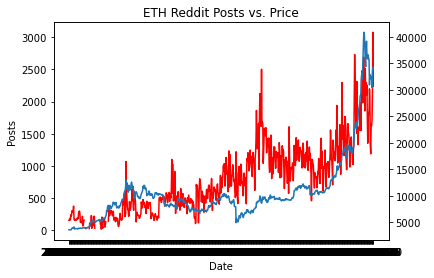

In [11]:
plt.figure(figsize=(12,8))
fig,ax=plt.subplots()
y_axis = bitcoin_df['reddit_posts']
y_axis2 = bitcoin_df['close']
x_axis = bitcoin_df['time']
plt.plot(x_axis, y_axis, label='Reddit Posts', color="red")
plt.xlabel("Date")
plt.ylabel("Posts")
plt.title("BTC Reddit Posts vs. Price")
ax2=ax.twinx()
plt.plot(x_axis, y_axis2, label='Price')

In [6]:
import os
import glob

path = r'resources/'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)

df = pd.concat(li, ignore_index=True)
df = df.fillna(0)
df

,Unnamed: 0,asset_id,time,open,close,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,news,volatility,youtube
0,0,3154,2019-11-06,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,1,3154,2019-11-19,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,2,3154,2019-11-22,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,3,3154,2019-11-26,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,4,3154,2019-12-06,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12383,715,3,2021-01-26,0.270734,0.269079,2.427055e+09,1.232141e+10,1087.0,921.0,15.0,...,7194.0,2229.0,8033089.0,115.0,3029.0,1161.0,8087.0,23.0,0.014970,8.0
12384,716,3,2021-01-27,0.256645,0.251627,2.553789e+09,1.220969e+10,1504.0,1074.0,26.0,...,7467.0,2764.0,9889800.0,72.0,3172.0,1012.0,7150.0,20.0,0.018403,22.0
12385,717,3,2021-01-28,0.268347,0.264884,2.416564e+09,1.149433e+10,1171.0,859.0,24.0,...,9906.0,3522.0,16048162.0,256.0,5033.0,1785.0,16028.0,12.0,0.021191,17.0
12386,718,3,2021-01-29,0.268101,0.282272,6.823405e+09,1.280620e+10,1128.0,716.0,42.0,...,11990.0,4434.0,15661825.0,242.0,5287.0,2464.0,20017.0,18.0,0.036205,2.0


In [7]:
df['asset_id']=df['asset_id'].astype(str)

Text(0, 0.5, 'Price')

<Figure size 864x576 with 0 Axes>

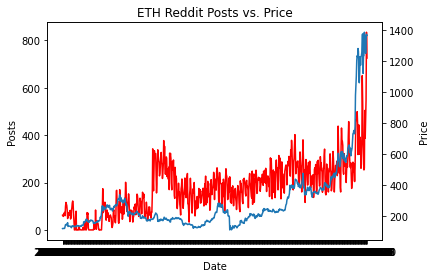

In [15]:

coin_df = df.loc[(df['asset_id']=='2')]
plt.figure(figsize=(12,8))
fig,ax=plt.subplots()
y_axis = coin_df['reddit_posts']
y_axis2 = coin_df['close']
x_axis = coin_df['time']
plt.plot(x_axis, y_axis, label='Reddit Posts', color="red")
plt.xlabel("Date")
plt.ylabel("Posts")

plt.title("ETH Reddit Posts vs. Price")
ax2=ax.twinx()
plt.plot(x_axis, y_axis2, label='Price')
plt.ylabel('Price')
